In [1]:
import rlssm
import pandas as pd
import os

/Users/Khamir/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Import the grouped data

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)

data = data[data.participant == 10].reset_index(drop=True)

data['block_label'] += 1

# data = data[data['trial_block'] == 1]

data

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,10,1.0,1.0,61.0,52.0,4,3,1.0,1.285418,0.0
1,10,1.0,2.0,54.0,37.0,4,2,1.5,1.577622,0.0
2,10,1.0,3.0,51.0,51.0,4,3,2.5,1.564731,0.0
3,10,1.0,4.0,50.0,35.0,3,1,2.0,1.217245,1.0
4,10,1.0,5.0,59.0,50.0,4,2,3.0,1.929781,0.0
...,...,...,...,...,...,...,...,...,...,...
234,10,3.0,76.0,50.0,33.0,2,1,36.5,1.479663,1.0
235,10,3.0,77.0,30.0,36.0,2,1,37.5,1.011038,1.0
236,10,3.0,78.0,51.0,47.0,4,2,39.0,1.367184,1.0
237,10,3.0,79.0,40.0,39.0,2,1,39.0,1.297691,1.0


#### Initialise the model

In [3]:
model = rlssm.RLRDModel_2A(1,
                           separate_learning_rates=False,
                           nonlinear_mapping=True)

Using cached StanModel


In [4]:
model.family, model.model_label, model.hierarchical_levels

('RLRDM_2A', 'RLRDM_2A_nonlin', 1)

### Fit

In [5]:
# sampling parameters
n_iter = 700
n_chains = 2
n_thin = 5

# learning parameters
K = 4 # n options
initial_value_learning = 17.5 # intitial value (Q0)

# bayesian model
alpha_priors = None
drift_scaling_priors = None
threshold_priors = None
ndt_priors = None

In [6]:
model_fit = model.fit(data,
                      K,
                      initial_value_learning,
                      alpha_priors=alpha_priors,
                      drift_scaling_priors=drift_scaling_priors,
                      threshold_priors=threshold_priors,
                      ndt_priors=ndt_priors,
                      thin = n_thin,
                      iter = n_iter,
                      chains = n_chains)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 140 iterations ended with a divergence (0.0%)
0 of 140 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


#### get Rhat

In [7]:
model_fit.rhat.describe()

,rhat
count,6.000000
mean,0.996746
std,0.011915
min,0.990302
25%,0.990800
50%,0.992271
75%,0.993907
max,1.020868


In [8]:
model_fit.rhat.head()

,rhat,variable
0,0.994408,alpha
1,0.990302,ndt
2,0.990354,drift_scaling
3,0.992406,threshold
4,0.992137,utility


#### get wAIC

In [9]:
model_fit.waic

{'lppd': -223.04210795103666,
 'p_waic': 5.204560070490922,
 'waic': 456.49333604305514,
 'waic_se': 28.883462976721326}

### Posteriors

In [10]:
model_fit.samples

,chain,draw,transf_alpha,transf_ndt,transf_drift_scaling,transf_threshold,transf_utility,transf_theta
0,0,68,0.536117,0.507470,0.126909,2.422901,0.688132,2.243605
1,0,3,0.378302,0.499997,0.104026,2.421005,0.758528,0.911911
2,0,33,0.524078,0.454991,0.132048,2.537707,0.692881,0.301672
3,0,16,0.371392,0.504272,0.124837,2.373213,0.682801,1.663206
4,0,67,0.451166,0.377950,0.138795,3.013431,0.702335,1.937401
...,...,...,...,...,...,...,...,...
135,1,4,0.423842,0.517134,0.198868,2.359683,0.575949,0.858403
136,1,56,0.455215,0.427550,0.080578,2.673299,0.823003,0.849018
137,1,12,0.589387,0.450636,0.147596,2.740127,0.670414,3.060265
138,1,42,0.433838,0.562461,0.158285,2.192662,0.620046,0.842702


In [11]:
model_fit.trial_samples

OrderedDict([('drift_cor_t',
              array([[0.98836633, 2.27678197, 2.17267505, ..., 2.58947794, 1.90243605,
                      1.79268787],
                     [0.94788118, 2.06285088, 2.12698133, ..., 2.75048057, 1.9695311 ,
                      1.89447183],
                     [0.97084809, 2.3407099 , 2.24470932, ..., 2.698084  , 1.95960859,
                      1.84566371],
                     ...,
                     [1.12033315, 2.5917658 , 2.4063222 , ..., 2.83285861, 2.10319045,
                      1.96596841],
                     [0.96127035, 1.92226404, 1.92922742, ..., 2.32599179, 1.76071219,
                      1.69337589],
                     [1.09797791, 1.84674748, 1.89890681, ..., 2.2967728 , 1.82003336,
                      1.77501195]])),
             ('drift_inc_t',
              array([[9.88366333e-01, 3.71204996e-02, 1.20550335e+00, ...,
                      9.32251019e-01, 1.34480688e+00, 1.49153087e+00],
                     [9.47881177e-0

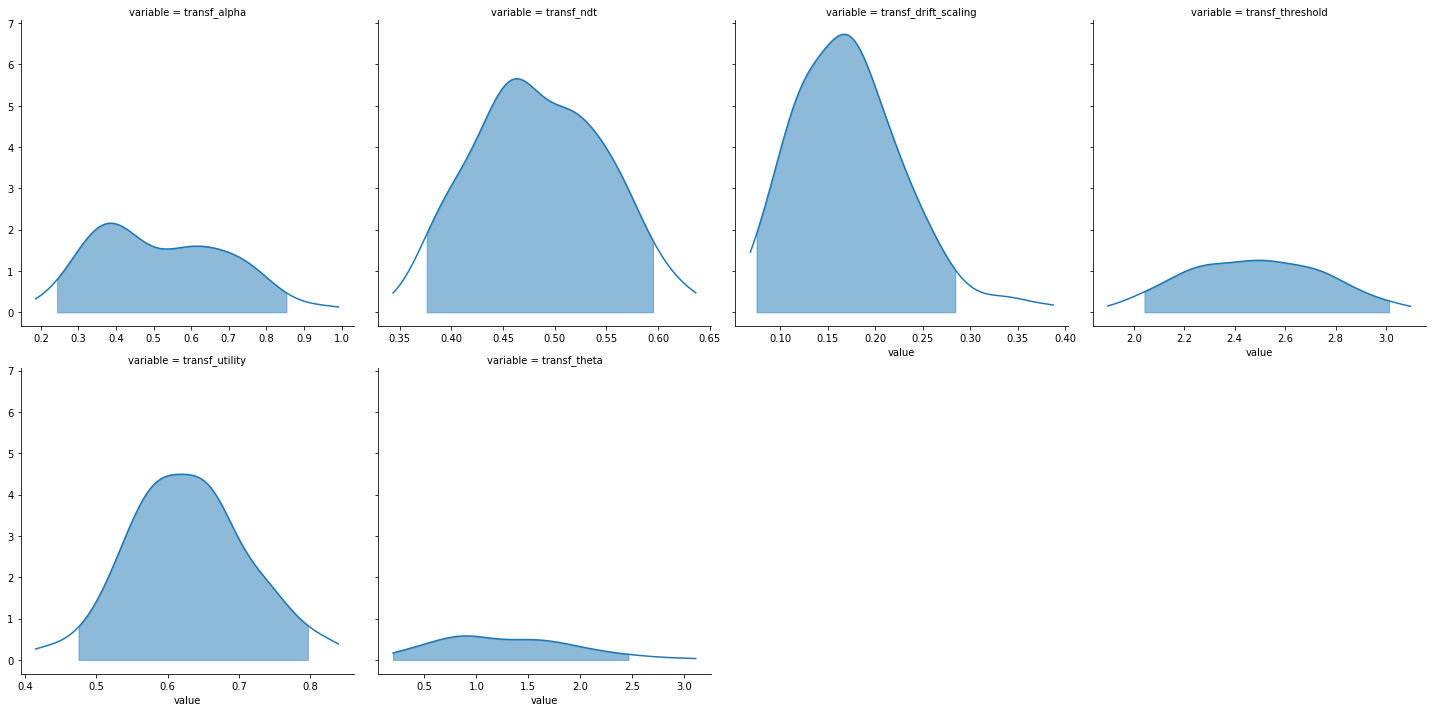

In [12]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

### Posterior predictives

In [13]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.370470  1.952470  1.337470  1.350470  1.026470  1.324470   
2         1.525997  2.562997  0.936997  1.103997  1.732997  1.296997   
3         2.069991  2.564991  1.993991  1.431991  2.467991  0.786991   
4         2.211272  1.016272  1.084272  2.159272  2.545272  1.422272   
5         1.629950  1.942950  1.108950  1.378950  1.484950  1.048950   
...            ...       ...       ...       ...       ...       ...   
96        4.177182  2.337182  1.211182  1.040182  2.172182  1.500182   
97        1.499919  1.080919  1.492919  1.031919  0.944919  1.362919   
98        3.060788  1.324788  1.605788  1.277788  1.261788  0.981788   
99        4.137661  1.247661  1.160661  1.516661  1.282661  1.523661   
100       1.570465  2.446465  2.476465  3.149465  1.566465  1.169465   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      230  231  232  233   
sample                                            ...                           
1         1.388470  1.676470  1.187470  1.260470  ...      0.0  1.0  0.0  1.0   
2         1.148997  1.228997  1.085997  1.093997  ...      1.0  1.0  1.0  1.0   
3         0.933991  1.627991  1.112991  1.269991  ...      1.0  1.0  0.0  1.0   
4         2.039272  1.079272  1.552272  6.388272  ...      0.0  0.0  1.0  1.0   
5         1.118950  1.583950  1.187950  1.760950  ...      1.0  0.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.206182  1.359182  1.215182  1.849182  ...      1.0  1.0  1.0  1.0   
97        1.008919  2.164919  1.657919  1.454919  ...      1.0  1.0  1.0  0.0   
98        1.247788  1.669788  1.113788  1.326788  ...      1.0  0.0  1.0  1.0   
99        2.893661  1.296661  1.221661  1.770661  ...      1.0  1.0  1.0  1.0   
100       1.287465  4.078465  1.597465  1.098465  ...      1.0  1.0  1.0  1.0   

variable                                
trial     234  235  236  237  238  239  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  0.0  
2         0.0  1.0  1.0  1.0  1.0  0.0  
3         1.0  0.0  0.0  0.0  0.0  0.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  0.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  0.0  0.0  0.0  0.0  1.0  
97        1.0  0.0  1.0  1.0  1.0  1.0  
98        1.0  0.0  0.0  1.0  1.0  1.0  
99        1.0  1.0  1.0  1.0  0.0  1.0  
100       1.0  1.0  1.0  0.0  1.0  1.0  

[100 rows x 478 columns]

In [14]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.682008,1.551194,0.989136,1.122470,1.326970,1.501970,1.695970,2.172470,1.068070,1.290270,1.436470,1.668870,2.114070
2,0.774059,1.506859,1.031838,1.108197,1.315197,1.471997,1.684297,2.131097,1.093197,1.251997,1.412997,1.598597,2.046797
3,0.728033,1.513936,2.377135,1.123991,1.379791,1.565991,1.811191,2.167991,1.053291,1.278791,1.397491,1.555991,1.912591
4,0.694561,1.488180,1.233508,1.082472,1.255472,1.426272,1.622472,1.856672,1.082772,1.249272,1.417772,1.640272,1.986772
5,0.719665,1.506523,1.394180,1.082750,1.248350,1.446950,1.756150,2.093950,1.081350,1.265250,1.458450,1.618050,1.936150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.732218,1.572818,1.593261,1.152382,1.289482,1.419182,1.702682,2.255882,1.083982,1.258382,1.478182,1.720182,2.110782
97,0.640167,1.532492,1.362617,1.058919,1.254919,1.515419,1.763919,2.157419,1.080119,1.263119,1.423919,1.590919,2.030319
98,0.640167,1.507373,1.294456,1.118788,1.268288,1.419288,1.589288,1.975288,1.074388,1.273588,1.434788,1.660588,2.121388


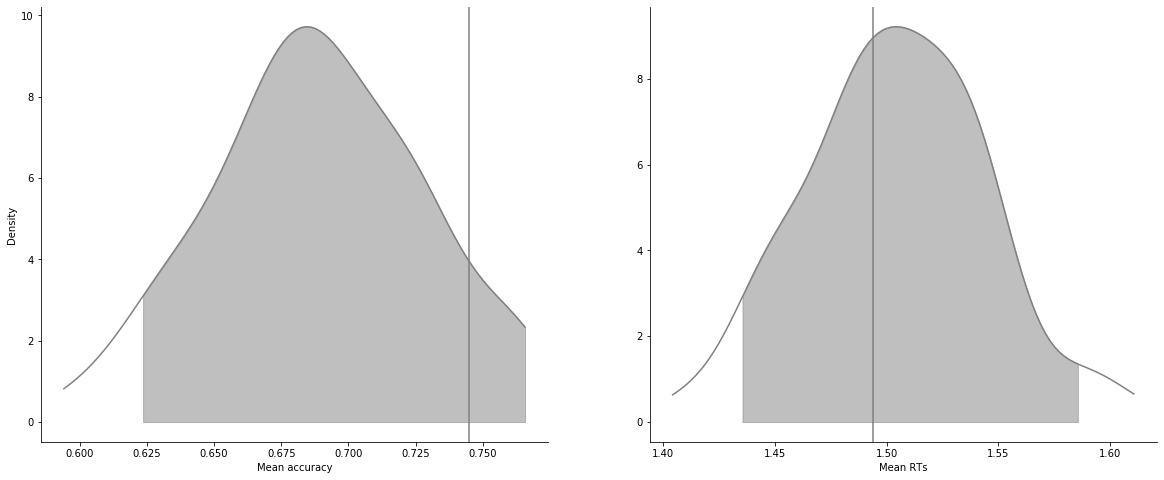

In [15]:
g = model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI')

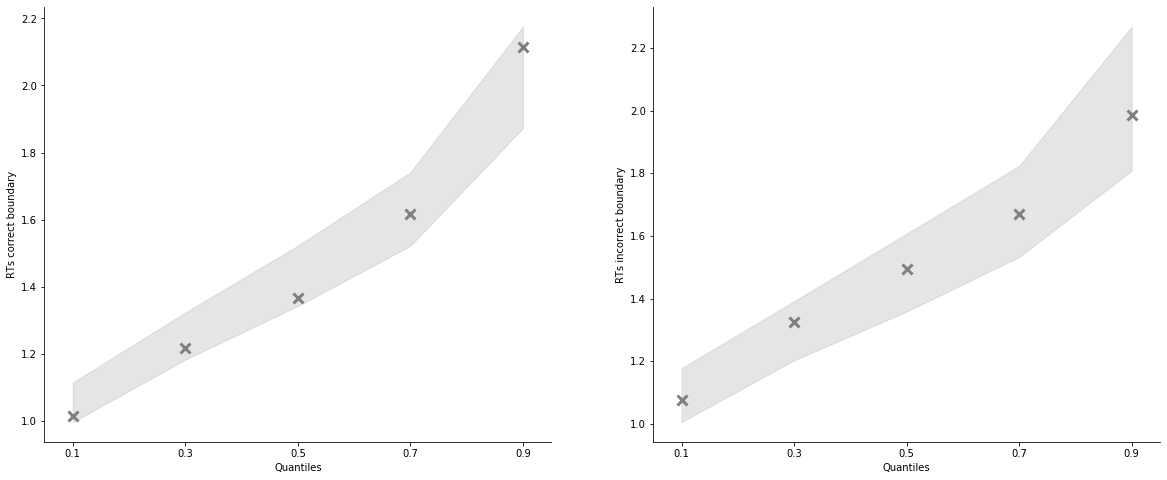

In [16]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [17]:
import numpy as np

In [18]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [19]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,10,1.0,1.0,61.0,52.0,4,3,1.0,1.285418,0.0,2,CD,1
1,1,10,1.0,2.0,54.0,37.0,4,2,1.5,1.577622,0.0,2,BD,1
2,2,10,1.0,3.0,51.0,51.0,4,3,2.5,1.564731,0.0,2,CD,1
3,3,10,1.0,4.0,50.0,35.0,3,1,2.0,1.217245,1.0,1,AC,1
4,4,10,1.0,5.0,59.0,50.0,4,2,3.0,1.929781,0.0,2,BD,1


In [20]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1.0         AB          1                0.70  1.560070  0.717347   
                        2                0.65  1.441397  0.235771   
                        3                0.80  1.571191  0.352267   
                        4                0.75  1.665772  1.516223   
                        5                0.65  1.627250  0.203663   
...                                       ...       ...       ...   
3.0         CD          96               0.45  1.295432  1.421073   
                        97               0.55  1.366819  0.079811   
                        98               0.60  1.375838  1.496528   
                        99               0.45  1.424311  0.270949   
                        100              0.50  1.526615  0.835327   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.334470             1.350770   
                        2                    1.281797             1.212597   
                        3                    1.591791             1.350491   
                        4                    1.341272             1.333472   
                        5                    1.370950             1.493750   
...                                               ...                  ...   
3.0         CD          96                   1.077182             1.164982   
                        97                   1.140519             1.362919   
                        98                   1.338288             1.143988   
                        99                   1.406661             1.154061   
                        100                  1.222165             1.460165   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.660470             1.478470   
                        2                    1.322997             1.375997   
                        3                    1.684991             1.562491   
                        4                    1.429272             1.481272   
                        5                    1.399950             1.676950   
...                                               ...                  ...   
3.0         CD          96                   1.243182             1.273182   
                        97                   1.291919             1.414919   
                        98                   1.351788             1.240788   
                        99                   1.586661             1.316661   
                        100                  1.458965             1.608465   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1.0         AB          1                    1.839970             1.601270  
                        2                    1.775397             1.654397  
                        3                    1.772091             1.674991  
                        4                    1.447672             1.801872  
                        5                    1.538950             1.933350  
...                                               ...                  ...  
3.0         CD          96                   1.361182             1.325382  
                        97                   1.428719             1.437919  
                        98                   1.435488             1.294188  
                        99                   1.621661             1.391861  
                        100                  1.535265             1.658165  

[1200 rows x 9 columns]

In [21]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.666667  1.593304  2.268706               1.362770   
           2            0.500000  1.520097  0.912789               1.427397   
           3            0.733333  1.667524  1.276454               1.444791   
           4            0.700000  1.640238  2.273111               1.277272   
           5            0.700000  1.468216  1.285552               1.173750   
...                          ...       ...       ...                    ...   
8          96           0.689655  1.553802  0.365929               1.674182   
           97           0.827586  1.274643  0.216206               1.435119   
           98           0.758621  1.412926  1.048872               1.194388   
           99           0.724138  1.514729  1.492335               1.433161   
           100          0.758621  1.668810  1.056396               1.469265   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.240070               1.662970   
           2                  1.124597               1.429997   
           3                  1.423591               1.547491   
           4                  1.301272               1.456272   
           5                  1.327950               1.282950   
...                                ...                    ...   
8          96                 1.338482               1.855182   
           97                 1.092519               1.479919   
           98                 1.271988               1.345788   
           99                 1.335661               1.570661   
           100                1.383965               1.598465   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.322970               1.874070   
           2                  1.373997               1.618397   
           3                  1.541991               1.764491   
           4                  1.537272               1.628272   
           5                  1.402950               1.644350   
...                                ...                    ...   
8          96                 1.461182               1.914182   
           97                 1.215419               1.503919   
           98                 1.413788               1.355988   
           99                 1.424661               1.708161   
           100                1.466465               2.238465   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.517670  
           2                  1.570397  
           3                  1.661191  
           4                  1.799272  
           5                  1.530950  
...                                ...  
8          96                 1.502482  
           97                 1.363419  
           98                 1.545888  
           99                 1.535661  
           100                1.635965  

[800 rows x 9 columns]

In [22]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,10,1.0,1.0,61.0,52.0,4,3,1.0,1.285418,0.0,2,CD,1
1,1,10,1.0,2.0,54.0,37.0,4,2,1.5,1.577622,0.0,2,BD,1
2,2,10,1.0,3.0,51.0,51.0,4,3,2.5,1.564731,0.0,2,CD,1
3,3,10,1.0,4.0,50.0,35.0,3,1,2.0,1.217245,1.0,1,AC,1
4,4,10,1.0,5.0,59.0,50.0,4,2,3.0,1.929781,0.0,2,BD,1


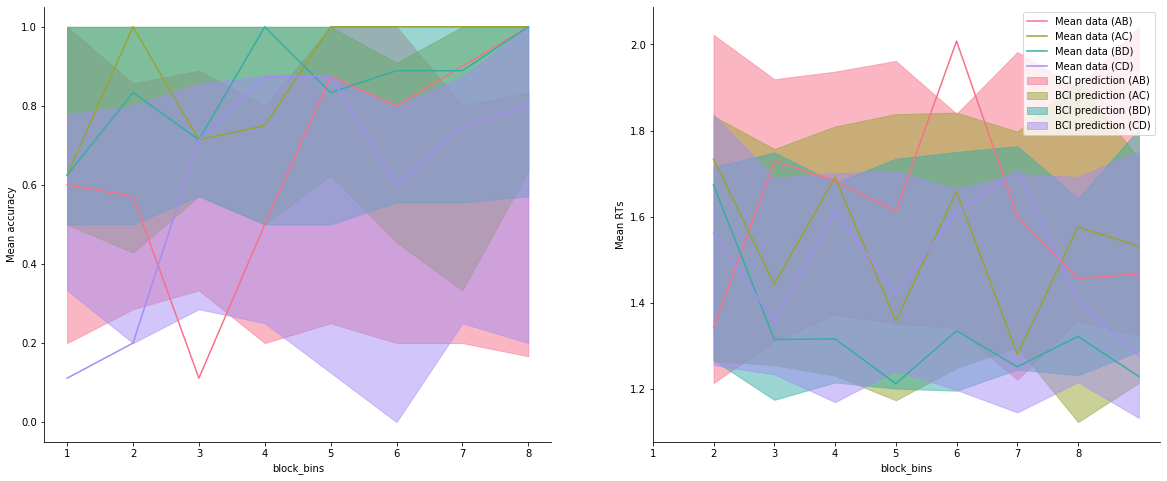

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

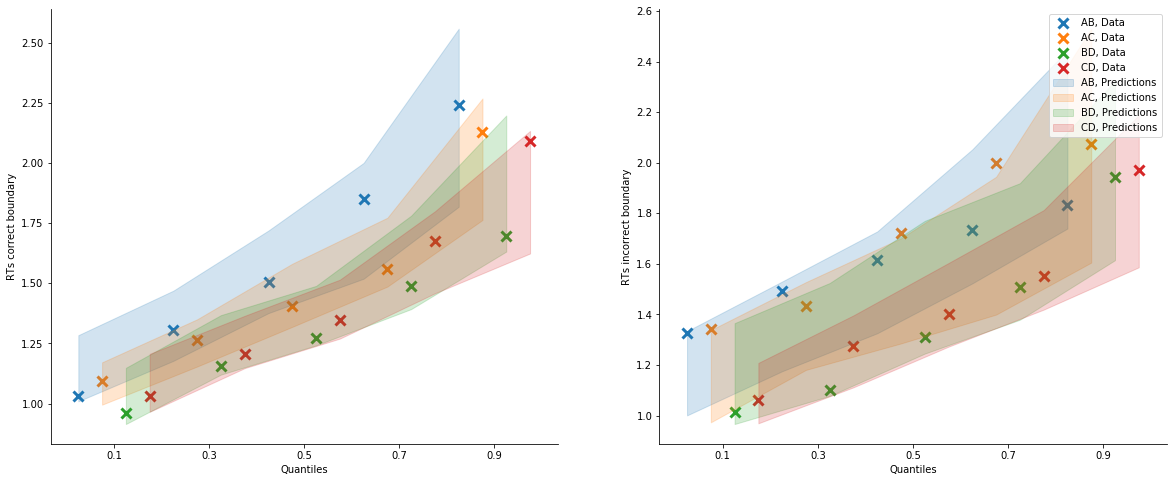

In [24]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=100,
                                                        grouping_var='choice_pair',
                                                        kind='shades',
                                                        quantiles=[.1, .3, .5, .7, .9]);

In [25]:
import seaborn as sns

/Users/Khamir/DecisionMaking/_Reports/_7/rlssm/rlssm/fits_race.py:242: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=140
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


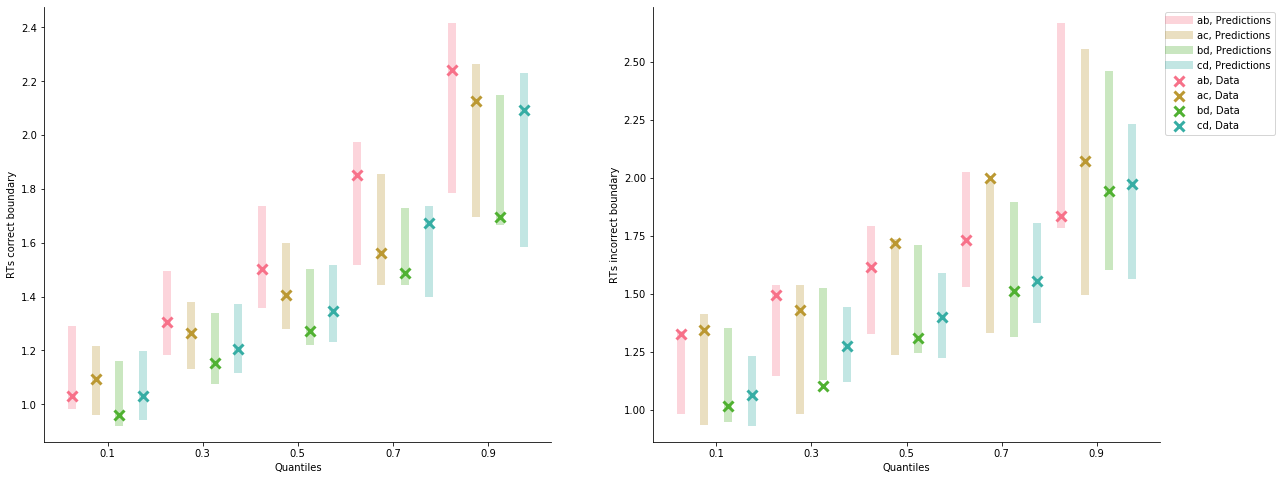

In [26]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=300,
    grouping_var='choice_pair',
    palette = sns.color_palette('husl'),
    intervals_kws={'alpha': .3, 'lw':8},
    hue_order=['AB', 'AC', 'BD', 'CD'],
    hue_labels=['ab', 'ac', 'bd', 'cd']);

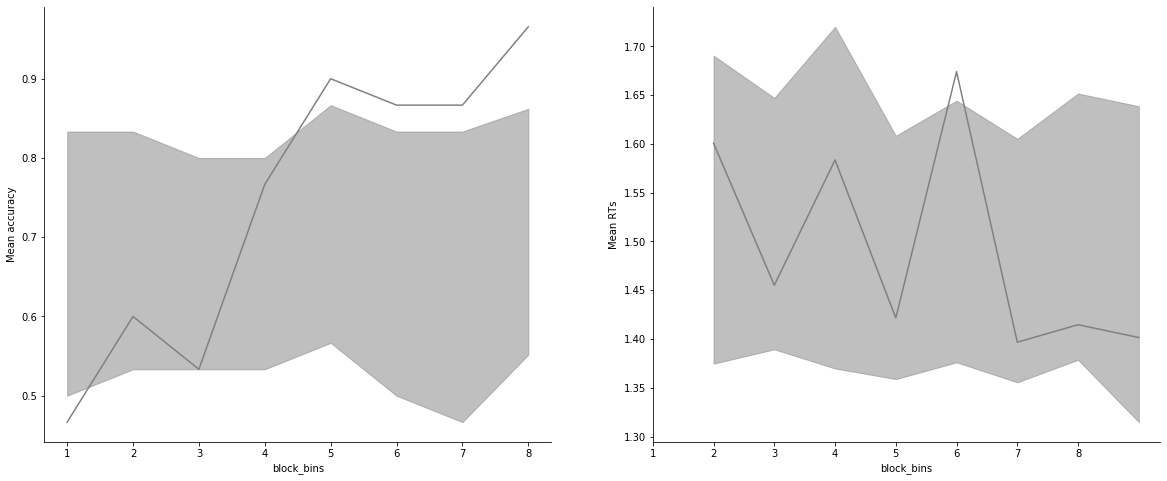

In [27]:
model_fit.plot_mean_grouped_posterior_predictives(
    grouping_vars=['block_bins'],
    n_posterior_predictives=100,
    figsize=(20,8));